## Korrelationen
Zeigt Korrelationen und Ausprägung der Korrelation zwischen Features des Datensets an.

##### Importe & Preprocessing

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import src.package.importer as imp
import src.package.importer_usages as imp_usg
import src.package.consts as c
import src.analysis.feature_engineering.garages as fe_grg

# import ans preprocess dataset
df = imp.get_extended_dataset('../package/datasets/full_dataset.csv')
df, usage_types = imp_usg.extract_usage_details(df)
df = imp.select_relevant_features(df, additional_features=[c.GARAGE_COMBINED])

# preprocess data
correlations = df.corr()

# remove duplicates
mask = np.triu(np.ones_like(correlations, dtype=bool))

### Alle Features
Zeigt Korrelationen zwischen allen Variablen / Features auf. (Big Picture)

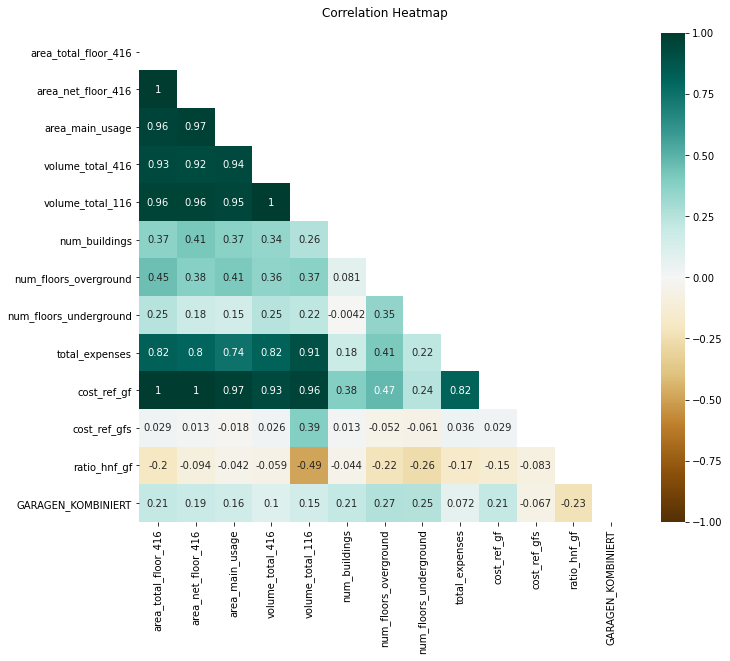

In [2]:
fig, ax = plt.subplots(figsize=(11, 9))

heatmap = sns.heatmap(correlations, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG', ax=ax)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=16);

# show and save plot
# plt.show()s
plt.savefig("exports/heatmap_correlation_multiDimensional_allFeatures.png", dpi=300)

### Unabhängige & Abhängige Variablen
Zeigt Korrelation der unabhängigen Variablen mit der abhängigen Variable (HNF-GF Ratio).

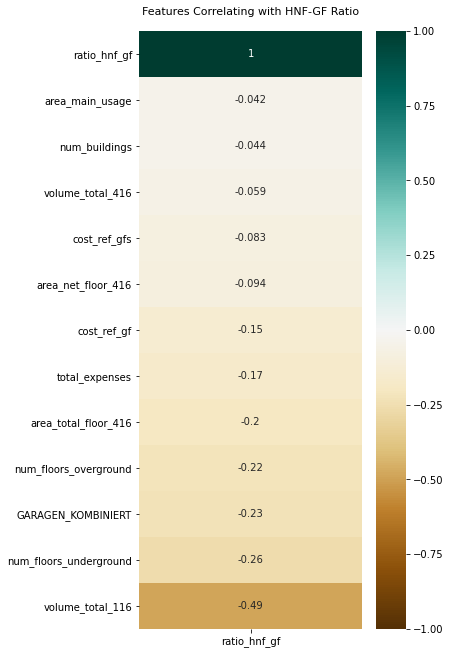

<Figure size 432x288 with 0 Axes>

In [3]:
# preproccess
correlations = correlations[[c.FIELD_HNF_GF_RATIO]].sort_values(by=c.FIELD_HNF_GF_RATIO, ascending=False)

# plot
fig, ax = plt.subplots(figsize=(5, 11))
heatmap = sns.heatmap(correlations, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with HNF-GF Ratio', fontdict={'fontsize':11}, pad=16);

# save plot
plt.show()
plt.savefig("exports/heatmap_correlation_oneDimensional_allFeatures.png", dpi=300)

## Garagen

Hat eine vorhandene Garage eine Korrelation zur HNF-GF Ratio?
Plot zeigt Verteilung des ratios für Gebäude mit und ohne Garage (Indoor).

garage_combined_present
False    331
True     114
Name: ratio_hnf_gf, dtype: int64

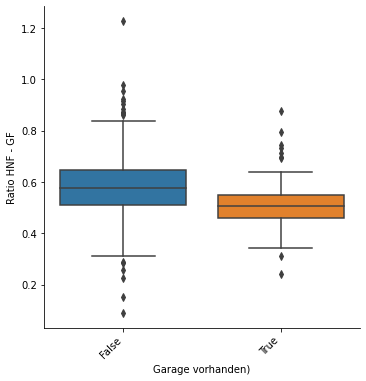

In [4]:
# preprocess
df = fe_grg.add_garage_present(df)
df[c.GARAGE_COMBINED_PRESENT] = df[c.GARAGE_COMBINED_PRESENT].astype('category')
data = df[c.FIELD_HNF_GF_RATIO]

# plot
gf = sns.catplot(x=c.GARAGE_COMBINED_PRESENT, y="ratio_hnf_gf", kind="box", data=df)
gf.set(xlabel='Garage vorhanden)', ylabel='Ratio HNF - GF')
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='normal',
    fontsize='medium'
)

# describe
data.groupby(df[c.GARAGE_COMBINED_PRESENT]).count()